<a href="https://colab.research.google.com/github/Yan-Lihui/ucb/blob/master/Lab_6_Skip_gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME = "Lihui Yan"

---

# Lab 5: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [ ]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim



--2020-08-20 23:16:02--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  49.2MB/s    in 29s     

2020-08-20 23:16:32 (53.4 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
word_vectors = model.wv
word_vectors.vocab
word_pairs = [      
              ('France','England'),
              ('smaller','bigger'),
              ('England','London'), 
              ('France','Rocket'),
              ('big','bigger')
            ]


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [ ]:
#This is an autograded cell, do not edit/delete
for pair in word_pairs:
    print(model.similarity(pair[0], pair[1]))


0.39804944
0.7302272
0.43992856
0.07114174
0.68423855


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [ ]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell

words = ['France','England','smaller','bigger','rocket','big']



In [ ]:
#This is an autograded cell, do not edit/delete
for word in words:
  print(model[word][:5])



[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [ ]:
#Replace 0 with the code / value; Do not delete this cell
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
word_vectors = model.wv
word_vectors.vocab
coords1 = model['France']
coords2 = model['England']
coords3 = model['smaller']
coords4 = model['bigger']
coords5 = model['London']
coords6 = model['France']
coords7 = model['Rocket']
coords8 = model['big']
def eucldist_vectorized(coords1, coords2):
    return np.sqrt(np.sum((coords1 - coords2)**2))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [ ]:
#This is an autograded cell, do not edit / delete
print(eucldist_vectorized(coords1,coords2))
print(eucldist_vectorized(coords3,coords4))
print(eucldist_vectorized(coords2,coords5))
print(eucldist_vectorized(coords1,coords7))
print(eucldist_vectorized(coords8,coords4))


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = 0
closest2 = 0
closest3 = 0
closest4 = 0
closest5 = 0
from gensim import models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
closest1=model.wv.most_similar(positive=['King','Queen'],negative=['Man'])[:2]
closest2=model.wv.most_similar(positive=['bigger','small'],negative=['big'])[:2]
closest3=model.wv.most_similar(positive=['man','programmer'],negative=['woman'])[:2]
closest4=model.wv.most_similar(positive=['waiting','run'],negative=['wait'])[:2]
closest5=model.wv.most_similar(positive=['Texas','Milwaukee'],negative=['Wisconsin'])[:2]







/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.

In [ ]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
import random
import pandas as pd
import numpy as np 
import gensim
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
words5 = random.sample(model.wv.vocab.keys(),20000)
dict_words={}
for word5 in words5:
  dict_words[word5]=model[word5]
df=pd.DataFrame.from_dict(dict_words).T
scores=[]
for i in range(5,100,10):
  kmeans=KMeans(n_clusters=i,random_state=0)  
  kmeans.fit(df)
  score=silhouette_score(df,kmeans.labels_)
  scores.append(score)
k_best=np.argmax(scores)+2
print(k_best)
kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(df)
centers=kmeans.cluster_centers_
for center in centers:
  print(model.similar_by_vector(center))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


2


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('By_QianMian_####-##-##', 0.8868101835250854), ('News_Weather_SportsWis', 0.8863681554794312), ('Emil_Protalinski_Published', 0.885381817817688), ('By_XiaoBing_####-##-##', 0.8835564851760864), ('STRIKE_PRICE_COMPARES_TO', 0.8762071132659912), ('BY_GEOFF_KOHL', 0.8760682344436646), ('BY_DANNY_GALLAGHER', 0.875302791595459), ('unshackled_handcuffs', 0.8748048543930054), ('SACRE_COEUR_MINERALS_LTD', 0.8739994764328003), ('By_HuDie_####-##-##', 0.8736629486083984)]
[('unmarried_heterosexual_couples', 0.9999999403953552), ('unmarried_heterosexual', 0.7316180467605591), ('heterosexual_couples', 0.7254163026809692), ('unmarried_heterosexuals', 0.6971464157104492), ('unmarried_couples', 0.694516122341156), ('gay_couples', 0.6683939695358276), ('sex_couples', 0.6668319702148438), ('homosexual_couples', 0.6638563871383667), ('heterosexual_unmarried_couples', 0.6553046107292175), ('unmarried_cohabitating_couples', 0.6326161623001099)]
[('Anelli', 1.0), ('Potter', 0.4868828058242798), ('MuggleN

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
nce_loss
In the skipgram model, given the center word, the conditional probability of generating background word can be obtained by doing softmax operation on vector inner product.
The model is to minimize the probability.

### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q5

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
[('unmarried_heterosexual_couples', 0.9999999403953552), ('unmarried_heterosexual', 0.7316180467605591), ('heterosexual_couples', 0.7254163026809692), ('unmarried_heterosexuals', 0.6971464157104492), ('unmarried_couples', 0.694516122341156), ('gay_couples', 0.6683939695358276), ('sex_couples', 0.6668319702148438), ('homosexual_couples', 0.6638563871383667), ('heterosexual_unmarried_couples', 0.6553046107292175), ('unmarried_cohabitating_couples', 0.6326161623001099)]
[('Mixi', 1.0), ('mixi', 0.6301102042198181), ('DeNA', 0.608712911605835), ('Cyworld', 0.5846588611602783), ('Kenji_Kasahara', 0.5730277299880981), ('carrier_NTT_DoCoMo', 0.5709043145179749), ('DeNA_Co.', 0.5486183166503906), ('Mobage_Town', 0.5459986925125122), ('CyberAgent', 0.5381788015365601), ('keitai', 0.5378262400627136)]

In [ ]:
Lab 6

In [16]:
import os
import string
import pandas as pd
import numpy as np
import re
import pprint
from urllib.request import urlopen

import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2020-08-21 03:33:30--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.86.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.86.117|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [19]:
url = "http://www.gutenberg.org/cache/epub/844/pg844.txt" ## Your raw text file location 
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)
firstlook[0:10]

['\ufeffThe Project Gutenberg eBook, The Importance of Being Earnest, by Oscar\r\nWilde\r\n\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.',
 'You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\n\r\n\r\n\r\nTitle: The Importance of Being Earnest\r\n       A Trivial Comedy for Serious People\r\n\r\n\r\nAuthor: Oscar Wilde\r\n\r\n\r\n\r\nRelease Date: August 29, 2006  [eBook #844]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: ISO-646-US (US-ASCII)\r\n\r\n\r\n***START OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST***\r\n\r\n\r\n\r\n\r\n\r\n\r\nTranscribed from the 1915 Methuen & Co. Ltd. edition by David Price,\r\nemail ccx074@pglaf.org\r\n\r\n\r\n\r\n\r\n\r\nThe Importance of Being Earnest\r\nA Trivial Comedy for Serious People\r\n\r\n\r\nTHE PERSONS IN THE PLAY\r\n\r\n\r\nJohn Worthing, J

In [7]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)
tokenized_raw[:10]

['The Project Gutenberg eBook , The Importance of Being Earnest , by Oscar Wilde This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'org Title : The Importance of Being Earnest A Trivial Comedy for Serious People Author : Oscar Wilde Release Date : August 29 , 2006 [ eBook 844 ] Language : English Character set encoding : ISO-646-US ( US-ASCII ) * * * START OF THE PROJECT GUTENBERG EBOOK THE IMPORTANCE OF BEING EARNEST * * * Transcribed from the 1915 Methuen Co .',
 'Ltd .',
 'edition by David Price , email ccx074 @ pglaf .',
 'org The Importance of Being Earnest A Trivial Comedy for Serious People THE PERSONS IN THE PLAY John Worthing , J.P. Algernon Moncrieff Rev .',
 'Canon Chasuble , D.D.',
 'Merriman , Butler Lane , Manservant Lady Bracknell Hon .',
 "Gwendolen Fairfax Cecil

In [8]:
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[:3]

[['The',
  'Project',
  'Gutenberg',
  'eBook',
  'The',
  'Importance',
  'of',
  'Being',
  'Earnest',
  'by',
  'Oscar',
  'Wilde',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever'],
 ['You',
  'may',
  'copy',
  'it',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included',
  'with',
  'this',
  'eBook',
  'or',
  'online',
  'at',
  'www'],
 ['gutenberg']]

In [9]:
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

3464

In [10]:
model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)
vector_list = model[unique_words]
len(vector_list)
for i in range(5):
    print(unique_words[i], vector_list[i])

adopted [ 0.00647054 -0.02338243  0.00534869  0.01297064 -0.00361234 -0.02207747
 -0.01289744  0.00496807  0.01004908 -0.00688447  0.01989302  0.02490742
  0.00687872  0.00445962 -0.0217708   0.00776553]
manner [ 0.10870595 -0.00942989  0.1534418  -0.08546929  0.09396841 -0.11738457
 -0.02474439 -0.08031733 -0.04767849  0.14891213  0.01339523  0.099103
  0.2700922  -0.01238662 -0.17917769 -0.13381112]
grammar [-0.01672928  0.01796025  0.0297228  -0.03021533  0.02921765  0.01774366
  0.0120944   0.00301032 -0.01414067  0.02020262 -0.0133133  -0.01237488
  0.04378416  0.00430023 -0.04443658  0.01637326]
gold [-0.00289786 -0.02420416  0.02972378 -0.00306771  0.01461408 -0.00585316
 -0.03403353 -0.03753833  0.01689988  0.00635831 -0.02301302 -0.01604839
  0.00427705 -0.01722183 -0.02921672 -0.0004642 ]
appears [ 0.01471133  0.00411968  0.02750103  0.01148104 -0.01474748 -0.0103477
 -0.01887175 -0.00485141 -0.00633431 -0.00490278 -0.00428176  0.00047838
  0.0038274   0.00255707 -0.02806475 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [20]:
from sklearn.manifold import TSNE
data_embed=TSNE(n_components=2, perplexity=70, verbose=2, method='barnes_hut').fit_transform(vector_list)


[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 3464 samples in 0.010s...
[t-SNE] Computed neighbors for 3464 samples in 0.466s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3464
[t-SNE] Computed conditional probabilities for sample 2000 / 3464
[t-SNE] Computed conditional probabilities for sample 3000 / 3464
[t-SNE] Computed conditional probabilities for sample 3464 / 3464
[t-SNE] Mean sigma: 0.031809
[t-SNE] Computed conditional probabilities in 0.575s
[t-SNE] Iteration 50: error = 72.6958084, gradient norm = 0.0872422 (50 iterations in 2.241s)
[t-SNE] Iteration 100: error = 69.7761078, gradient norm = 0.0057432 (50 iterations in 1.562s)
[t-SNE] Iteration 150: error = 69.5938873, gradient norm = 0.0048264 (50 iterations in 1.580s)
[t-SNE] Iteration 200: error = 69.5181122, gradient norm = 0.0021831 (50 iterations in 1.537s)
[t-SNE] Iteration 250: error = 69.4895172, gradient norm = 0.0006994 (50 iterations in 1.490s)
[t-SNE] KL divergence after 250 iterat

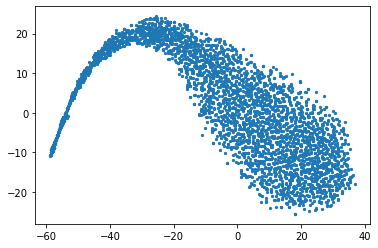

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() ## The plots vary each time you run them 